In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from steady_BEM import steady_BEM
from unsteady_BEM import unsteady_BEM

In [2]:
# define flow conditions
Uinf = 10 # unperturbed wind speed in m/s
TSR = 10 # tip speed ratio
Radius = 50
N_blade_sec = 30
NBlades = 3

TipLocation_R =  1
RootLocation_R =  0.2
pitch = 2

airfoil = 'DU_polar.txt'

B = steady_BEM(airfoil, TipLocation_R, RootLocation_R, NBlades, Radius, Uinf, TSR, N_blade_sec)
CT,CP, results = B.get_solution(pitch)
print('CT: {}'.format(CT))
print('CP: {}'.format(CP))
    

we are at 0 iterations
we are at 20 iterations
we are at 40 iterations
we are at 60 iterations
we are at 80 iterations
we are at 100 iterations
we are at 120 iterations
we are at 140 iterations
we are at 160 iterations
we are at 180 iterations
CT: 0.7639060052917839
CP: 0.4579575276239512


In [2]:
# define flow conditions
Uinf = 10 # unperturbed wind speed in m/s
TSR = 10 # tip speed ratio
Radius = 50
N_blade_sec = 30
NBlades = 3

TipLocation_R =  1
RootLocation_R =  0.2
spacing = 'cosine'

airfoil = 'DU_polar.txt'

#initialize the unsteady BEM model
B_unsteady = unsteady_BEM(airfoil, TipLocation_R, RootLocation_R, NBlades, Radius, Uinf, TSR, N_blade_sec,spacing=spacing)

we are at 0 iterations
we are at 20 iterations
we are at 40 iterations
we are at 60 iterations
we are at 80 iterations
we are at 100 iterations
we are at 120 iterations
we are at 140 iterations
we are at 160 iterations
we are at 180 iterations


In [13]:
#create the time array
dt = 0.001
time_range = np.arange(0,3,dt)

#create the quasi-steady thrust coefficient as a function of the above time vector
CT_time = 0.5*np.ones(len(time_range))
CT_time[time_range>0.5] = 0.9

#define the inflow model
inflow_model = 'pitt_peters'
a_pp,ap_pp,fnorm_pp,ftan_pp,gamma_pp,Ct_pp=B_unsteady.get_solution(time_range,CT_time,inflow_model = inflow_model)
inflow_model = 'oye'
a_oye,ap_oye,fnorm_oye,ftan_oye,gamma_oye,Ct_oye=B_unsteady.get_solution(time_range,CT_time,inflow_model = inflow_model)
inflow_model = 'larsen_madsen'
a_lm,ap_lm,fnorm_lm,ftan_lm,gamma_lm,Ct_lm=B_unsteady.get_solution(time_range,CT_time,inflow_model = inflow_model)

_,CP_sol1,steady_sol1 = B_unsteady.B_steady.get_solution(B_unsteady.pitch_time[0])
_,CP_sol2,steady_sol2 = B_unsteady.B_steady.get_solution(B_unsteady.pitch_time[-1])

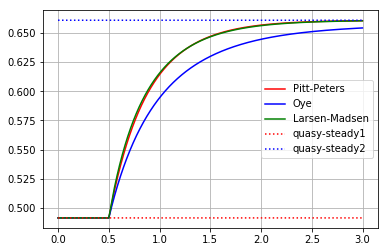

In [14]:
#plot results
plt.plot(time_range,a_pp[0,:],'r',label='Pitt-Peters')
plt.plot(time_range,a_oye[0,:],'b',label = 'Oye' )
plt.plot(time_range,a_lm[0,:],'g',label='Larsen-Madsen')
plt.plot(time_range,steady_sol1[0,0]*np.ones(len(time_range)),'r',linestyle='dotted', label = 'quasy-steady1')
plt.plot(time_range,steady_sol2[0,0]*np.ones(len(time_range)),'b',linestyle='dotted', label = 'quasy-steady2')
plt.legend()
plt.grid(True)




In [28]:
#create the time array
dt = 0.01
time_range_s = np.arange(0,50,dt)

#calculate omega
Omega = TSR*Uinf/Radius

#create the quasi-steady thrust coefficient as a function of the above time vector
CT_time_s = 0.5+0.5*np.sin(0.3*Uinf/Radius*time_range_s)

inflow_model = 'pitt_peters'
a_pp_s,ap_pp_s,fnorm_pp_s,ftan_pp_s,gamma_pp_s,Ct_pp_s=B_unsteady.get_solution(time_range_s,CT_time_s,inflow_model = inflow_model)
inflow_model = 'oye'
a_oye_s,ap_oye_s,fnorm_oye_s,ftan_oye_s,gamma_oye_s,Ct_oye_s=B_unsteady.get_solution(time_range_s,CT_time_s,inflow_model = inflow_model)
inflow_model = 'larsen_madsen'
a_lm_s,ap_lm_s,fnorm_lm_s,ftan_lm_s,gamma_lm_s,Ct_lm_s=B_unsteady.get_solution(time_range_s,CT_time_s,inflow_model = inflow_model)



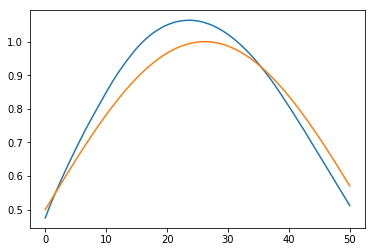

In [35]:
plt.plot(time_range_s,Ct_pp_s[15,:])
plt.plot(time_range_s,CT_time_s)